# Error matrix spectral norm bound

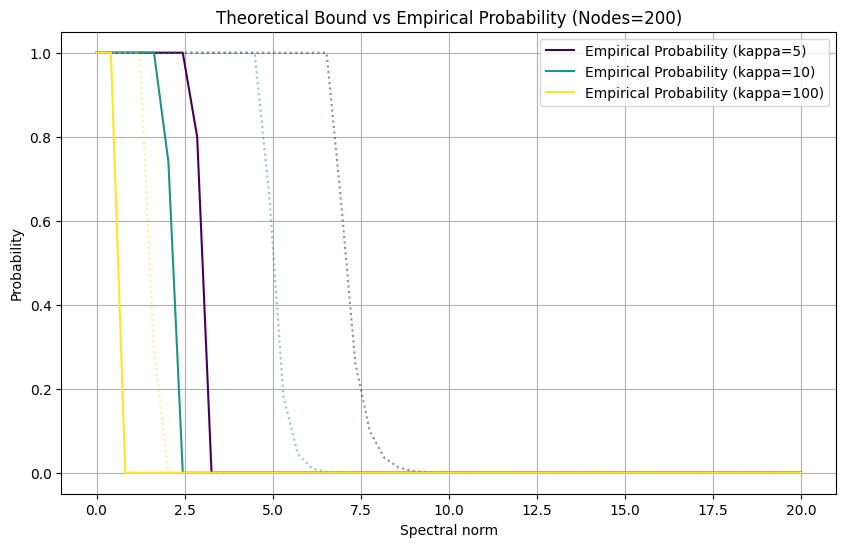

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
    S2 = np.array([[0, 0, 1], [0, 0, 0], [-1, 0, 0]])
    S3 = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))
    for i in range(n):
        for j in range(n):
            kron_matrix[3 * i:3 * (i + 1), 3 * j:3 * (j + 1)] = D_matrices[i][j]

    return kron_matrix

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute theoretical bound per instance
def theoretical_bound(t, num_nodes, kappa, max_degree):
    return np.minimum((2 * 3 * num_nodes) * np.exp((- kappa * t ** 2) / (2 * max_degree)), 1)

# Parameters
num_nodes = 200  # Number of nodes
kappa_values = [5, 10, 100]  # Different values of kappa to test
num_trials = 50  # Number of trials per kappa
t_values = np.linspace(0, 20, 50)  # Range of t values for probability estimation

# Store results
results = {kappa: {'eigenvalues': [], 'theoretical_bounds': []} for kappa in kappa_values}

r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
# Generate a random geometric graph
G = nx.random_geometric_graph(num_nodes, r)
max_degree = max(dict(G.degree()).values())  # Compute max degree per trial
Fielder_value = nx.algebraic_connectivity(G)  # Compute Fielder value
# Run experiments
for kappa in kappa_values:
    sigma = np.sqrt(1 / (2 * kappa))  # Standard deviation for random normal samples
    # Compute theoretical bound specific to this graph instance
    bound_values = theoretical_bound(t_values, num_nodes, kappa, max_degree)
    results[kappa]['theoretical_bounds'].append(bound_values)

    adj_matrix = nx.adjacency_matrix(G).todense()
    for _ in range(num_trials):
        # Generate Kronecker matrix and compute largest eigenvalue
        kron_matrix = generate_kron_matrix(adj_matrix, sigma)
        largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
        # Store results
        results[kappa]['eigenvalues'].append(largest_eigenvalue)

# Compute empirical probabilities
fig, ax = plt.subplots(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1, len(kappa_values)))

for kappa, color in zip(kappa_values, colors):
    eigenvalues = np.array(results[kappa]['eigenvalues'])

    # Compute empirical probability
    empirical_probs = [np.mean(eigenvalues >= t) for t in t_values]

    # Plot empirical probability (solid line)
    ax.plot(t_values, empirical_probs, label=f'Empirical Probability (kappa={kappa})', linestyle='solid', color=color)

    # Plot all theoretical bounds as dotted lines
    for bound_values in results[kappa]['theoretical_bounds']:
        ax.plot(t_values, bound_values, linestyle='dotted', color=color, alpha=0.5)

ax.set_xlabel('Spectral norm')
ax.set_ylabel('Probability')
ax.set_title(f'Theoretical Bound vs Empirical Probability (Nodes={num_nodes})')
ax.legend()
ax.grid(True)
plt.show()


# ratio bound

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Function to generate a block symmetric Kronecker matrix
def generate_kron_matrix(adj_matrix, sigma):
    S1 = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
    S2 = np.array([[0, 0, 1], [0, 0, 0], [-1, 0, 0]])
    S3 = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

    n = adj_matrix.shape[0]
    D_matrices = [[None for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i, n):
            if adj_matrix[i, j] != 0:
                phi = np.random.normal(0, sigma, 3)
                D = phi[0] * S1 + phi[1] * S2 + phi[2] * S3
                D_matrices[i][j] = D
                D_matrices[j][i] = D.T
            else:
                D_matrices[i][j] = np.zeros((3, 3))
                D_matrices[j][i] = np.zeros((3, 3))

    kron_matrix = np.zeros((3 * n, 3 * n))
    for i in range(n):
        for j in range(n):
            kron_matrix[3 * i:3 * (i + 1), 3 * j:3 * (j + 1)] = D_matrices[i][j]

    return kron_matrix

# Function to compute the largest eigenvalue of a matrix
def compute_largest_eigenvalue(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return np.max(np.abs(eigenvalues))

# Function to compute theoretical bound per instance
def theoretical_bound(t, num_nodes, kappa, max_degree, Fielder_value):
    return np.minimum((2 * 3 * num_nodes) * np.exp((- kappa * t ** 2 * Fielder_value ** 2) / (2 * max_degree)), 1)

# Parameters
num_nodes = 200  # Number of nodes
kappa_values = [5, 10, 100]  # Different values of kappa to test
num_trials = 50  # Number of trials per kappa
t_values = np.linspace(0, 600, 600)  # Range of t values for probability estimation

# Store results
results = {kappa: {'eigenvalues': [], 'theoretical_bounds': []} for kappa in kappa_values}

r = 1.25 * np.sqrt(np.log(num_nodes) / (np.pi * num_nodes))
# Generate a random geometric graph
G = nx.random_geometric_graph(num_nodes, r)
max_degree = max(dict(G.degree()).values())  # Compute max degree per trial
Fielder_value = nx.algebraic_connectivity(G)  # Compute Fielder value
# Run experiments
for kappa in kappa_values:
    sigma = np.sqrt(1 / (2 * kappa))  # Standard deviation for random normal samples
    # Compute theoretical bound specific to this graph instance
    bound_values = theoretical_bound(t_values, num_nodes, kappa, max_degree, Fielder_value)
    results[kappa]['theoretical_bounds'].append(bound_values)

    adj_matrix = nx.adjacency_matrix(G).todense()
    for _ in range(num_trials):
        # Generate Kronecker matrix and compute largest eigenvalue
        kron_matrix = generate_kron_matrix(adj_matrix, sigma)
        largest_eigenvalue = compute_largest_eigenvalue(kron_matrix)
        # Store results
        results[kappa]['eigenvalues'].append(largest_eigenvalue/Fielder_value)

# Compute empirical probabilities
fig, ax = plt.subplots(figsize=(10, 6))
colors = cm.viridis(np.linspace(0, 1, len(kappa_values)))

for kappa, color in zip(kappa_values, colors):
    eigenvalues = np.array(results[kappa]['eigenvalues'])

    # Compute empirical probability
    empirical_probs = [np.mean(eigenvalues >= t) for t in t_values]

    # Plot empirical probability (solid line)
    ax.plot(t_values, empirical_probs, label=f'Empirical Probability (kappa={kappa})', linestyle='solid', color=color)

    # Plot all theoretical bounds as dotted lines
    for bound_values in results[kappa]['theoretical_bounds']:
        ax.plot(t_values, bound_values, linestyle='dotted', color=color, alpha=0.5)

ax.set_xlabel('Spectral norm')
ax.set_ylabel('Probability')
ax.set_title(f'Theoretical Bound vs Empirical Probability (Nodes={num_nodes})')
ax.legend()
ax.grid(True)
plt.show()
